<a href="https://colab.research.google.com/github/aditya2k5/women_corelation_dataset/blob/main/wemon_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('WomenCorrelation.csv')

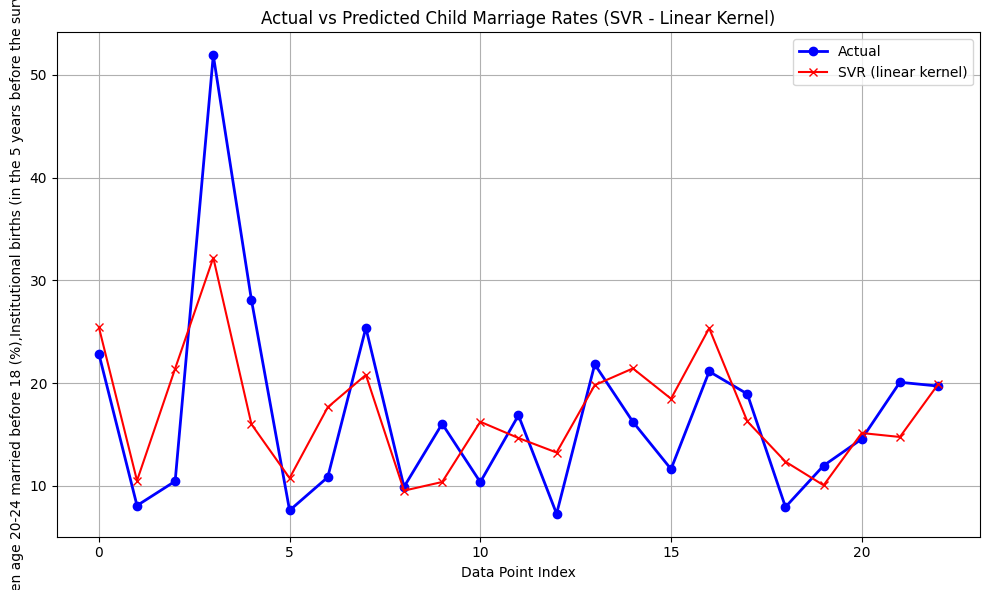

Mean Absolute Error (MAE): 5.03
Mean Squared Error (MSE): 43.74
Root Mean Squared Error (RMSE): 6.61
R² Score: 0.52


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


def clean_numeric(value):
    try:
        # Remove parentheses and other unwanted characters
        cleaned = str(value).replace('(', '').replace(')', '').strip()
        return float(cleaned)
    except (ValueError, AttributeError):
        # Return NaN for invalid values
        return np.nan

# Drop rows with missing values and clean the data
df_cleaned = df.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply cleaning to the relevant columns
df_cleaned["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years %"] = df_cleaned[
    "Women (age 15-49) who are literate4 (%)"
].apply(clean_numeric)
df_cleaned["Women age 20-24 years married before age 18 years (%)"] = df_cleaned[
    "Women age 20-24 years married before age 18 years (%)"
].apply(clean_numeric)

# Drop rows with NaN after cleaning
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years %"]]
y = df_cleaned["Women age 20-24 years married before age 18 years (%)"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features and target
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize and train SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict and inverse scale the results
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()

# Plot Actual vs Predicted (SVR only)
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o', color='blue', linewidth=2)
plt.plot(range(len(y_pred_svr)), y_pred_svr, label='SVR (linear kernel)', color='red', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Women age 20-24 married before 18 (%),Institutional births (in the 5 years before the survey) (%)')
plt.title('Actual vs Predicted Child Marriage Rates (SVR - Linear Kernel)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_svr)
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def clean_numeric(value):
    try:
        # Remove parentheses and other unwanted characters
        cleaned = str(value).replace('(', '').replace(')', '').strip()
        return float(cleaned)
    except (ValueError, AttributeError):
        # Return NaN for invalid values
        return np.nan

# Drop rows with missing values and clean the data
df_cleaned = df.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# Apply cleaning to the relevant columns
df_cleaned["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%)"] = df_cleaned[
    "Women (age 15-49) who are literate4 (%)"
].apply(clean_numeric)
df_cleaned["Women age 20-24 years married before age 18 years (%)"] = df_cleaned[
    "Women age 20-24 years married before age 18 years (%)"
].apply(clean_numeric)

# Drop rows with NaN after cleaning
df_cleaned = df_cleaned.dropna()

# Define features and target variable
X = df_cleaned[["Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years (%"]]
y = df_cleaned["Women age 20-24 years married before age 18 years (%)"]

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (optional for linear regression, but kept for consistency)
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o', color='blue', linewidth=2)
plt.plot(range(len(y_pred_lr)), y_pred_lr, label='Linear Regression', color='red', marker='x')
plt.xlabel('Data Point Index')
plt.ylabel('Women age 20-24 married before 18 (%),')
plt.title('Actual vs Predicted Child Marriage Rates (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot of literacy vs early marriage with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lr, color='red', label='Regression Line')
plt.xlabel('Women (age 15-49) literate (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 married before 18 (%)')
plt.ylabel('Women age 20-24 married before 18 (%)')
plt.title('Literacy vs Early Marriage (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print results
print(f"Slope: {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

KeyError: "None of [Index(['Women (age 15-49) who are literate4 (%),Institutional births (in the 5 years before the survey) (%),Women age 20-24 years married before age 18 years (%'], dtype='object')] are in the [columns]"

Data Summary:
       Number of Households surveyed  \
count                      75.000000   
mean                      942.800000   
std                        50.807799   
min                       713.000000   
25%                       931.000000   
50%                       953.000000   
75%                       977.000000   
max                       989.000000   

       Number of Women age 15-49 years interviewed  \
count                                    75.000000   
mean                                   1241.653333   
std                                     123.448150   
min                                     805.000000   
25%                                    1177.000000   
50%                                    1258.000000   
75%                                    1316.500000   
max                                    1561.000000   

       Number of Men age 15-54 years interviewed  \
count                                  75.000000   
mean                              

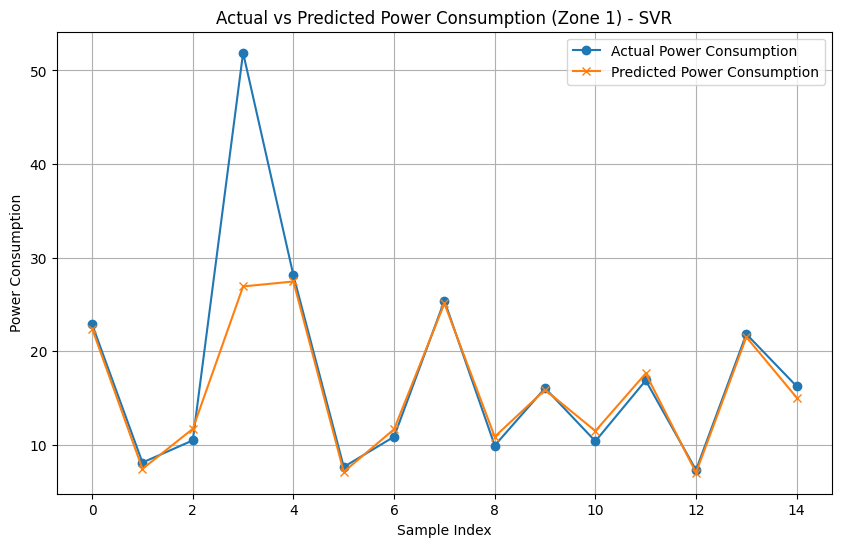

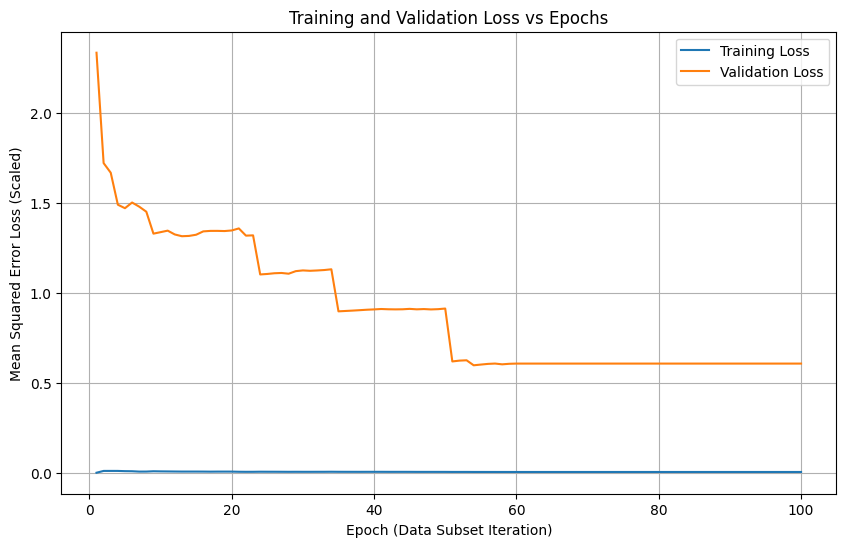

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data inspection
print("Data Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Features (consistent with previous code)
features = ['Women (age 15-49) who are literate4 (%)','Female population age 6 years and above who ever attended school (%)','Women age 20-24 years married before age 18 years (%)']
X = df[features]
y = df['Women age 20-24 years married before age 18 years (%)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardize target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Simulate epochs by incrementally increasing training data
n_epochs = 100
train_losses = []
val_losses = []
n_samples = len(X_train)
step_size = max(1, n_samples // n_epochs)  # Ensure at least 1 sample per step

# Initialize model
model = SVR(kernel='rbf', C=100, epsilon=0.1)

for epoch in range(n_epochs):
    # Use increasing subsets of training data
    end_idx = min((epoch + 1) * step_size, n_samples)
    X_train_subset = X_train[:end_idx]
    y_train_subset = y_train[:end_idx]

    # Train model on subset
    model.fit(X_train_subset, y_train_subset)

    # Compute training and validation loss
    y_pred_train = model.predict(X_train_subset)
    y_pred_val = model.predict(X_test)
    train_loss = mean_squared_error(y_train_subset, y_pred_train)
    val_loss = mean_squared_error(y_test, y_pred_val)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Final model training on full training data
model.fit(X_train, y_train)
y_pred_scaled = model.predict(X_test)

# Inverse transform for evaluation
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Testing
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig[:20000], label='Actual Power Consumption', marker='o')
plt.plot(y_pred[:20000], label='Predicted Power Consumption', marker='x')
plt.title('Actual vs Predicted Power Consumption (Zone 1) - SVR')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epoch (Data Subset Iteration)')
plt.ylabel('Mean Squared Error Loss (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


Data Summary:
       Number of Households surveyed  \
count                      75.000000   
mean                      942.800000   
std                        50.807799   
min                       713.000000   
25%                       931.000000   
50%                       953.000000   
75%                       977.000000   
max                       989.000000   

       Number of Women age 15-49 years interviewed  \
count                                    75.000000   
mean                                   1241.653333   
std                                     123.448150   
min                                     805.000000   
25%                                    1177.000000   
50%                                    1258.000000   
75%                                    1316.500000   
max                                    1561.000000   

       Number of Men age 15-54 years interviewed  \
count                                  75.000000   
mean                              

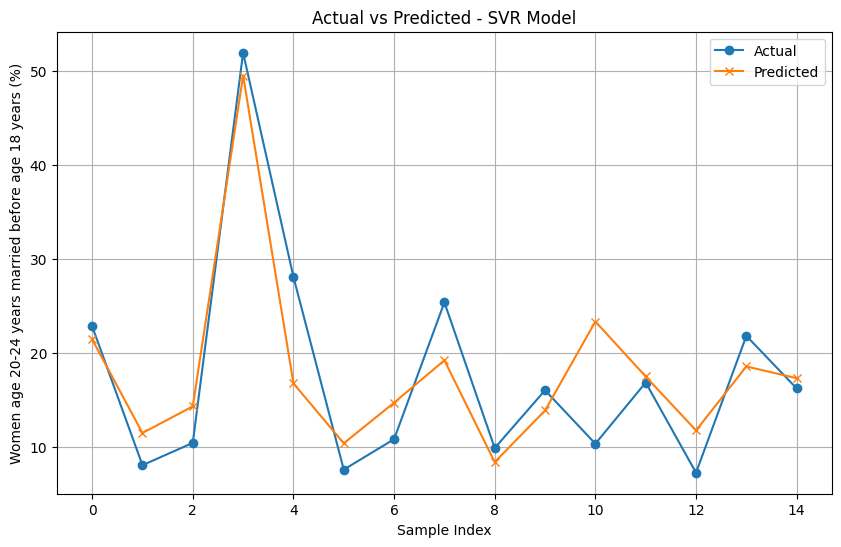

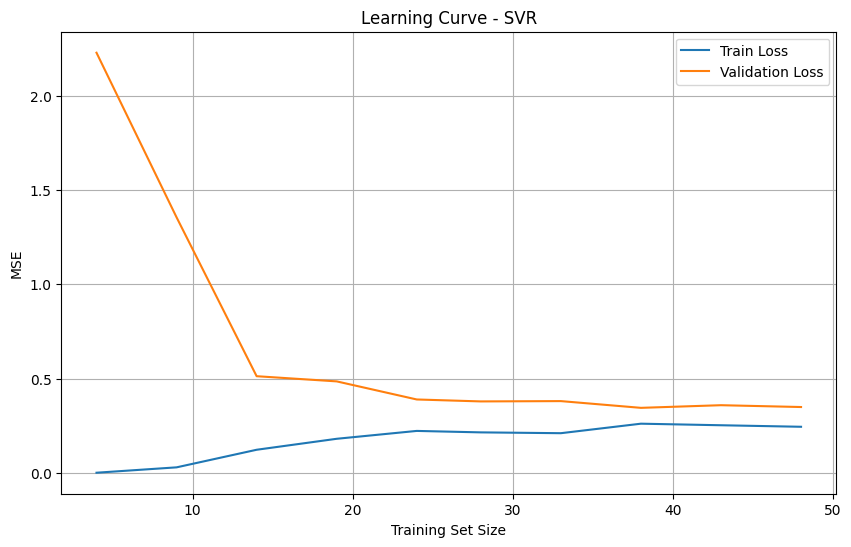

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures  # Optional

# ------------------ Load & Inspect Data ------------------
print("Data Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# ------------------ Feature Selection ------------------
# ✅ Removed target column from features to avoid data leakage
features = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)','All women age 15-19 years who are anaemic22 (%) '
]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Optional: Polynomial Features ------------------
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Grid Search for Hyperparameter Tuning ------------------
param_grid = {
    'C': [1, 10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:", grid_search.best_params_)

# ------------------ Final Model with Best Params ------------------
model = grid_search.best_estimator_

# Train on full training data
model.fit(X_train, y_train)

# Predict on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# ------------------ Evaluation ------------------
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n🎯 Final Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# ------------------ Plot: Actual vs Predicted ------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted - SVR Model')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Plot: Learning Curve (Optional) ------------------
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Train Loss")
plt.plot(train_sizes, val_errors, label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve - SVR")
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits

✅ Best Parameters Found: {'C': 10, 'epsilon': 0.1, 'gamma': 0.001}

🎯 Final Evaluation (Improved SVR):
Mean Squared Error (MSE): 43.8516
R² Score: 0.6543


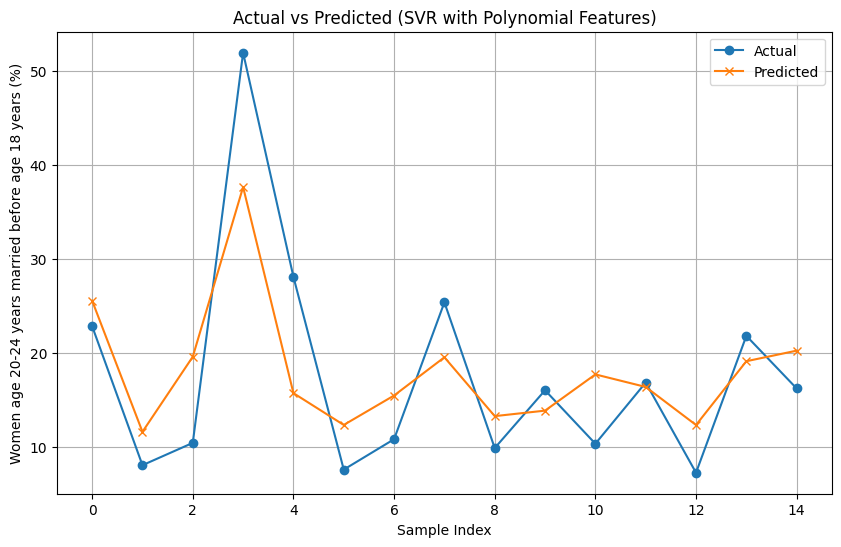

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

# ------------------ Feature Selection ------------------
features = [
    'Women (age 15-49) who are literate4 (%)', 'Female population age 6 years and above who ever attended school (%)','Households using clean fuel for cooking3 (%)'


]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Polynomial Feature Expansion ------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Grid Search for SVR ------------------
param_grid = {
    'C': [10, 100, 500, 1000],
    'epsilon': [0.001, 0.01, 0.1, 0.5],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

grid_search = GridSearchCV(
    SVR(kernel='linear'),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("\n✅ Best Parameters Found:", grid_search.best_params_)

# ------------------ Final Model ------------------
model = grid_search.best_estimator_
model.fit(X_train, y_train)

# Predict
y_pred_scaled = model.predict(X_test)

# Inverse transform
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation
mse = mean_squared_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n🎯 Final Evaluation (Improved SVR):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted (SVR with Polynomial Features)')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - loss: 0.9158 - mae: 0.6361 - val_loss: 0.9885 - val_mae: 0.7490
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5886 - mae: 0.5629 - val_loss: 0.7888 - val_mae: 0.6818
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4682 - mae: 0.4896 - val_loss: 0.6657 - val_mae: 0.6457
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.5977 - mae: 0.5446 - val_loss: 0.5826 - val_mae: 0.6163
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5200 - mae: 0.5032 - val_loss: 0.5222 - val_mae: 0.5867
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5237 - mae: 0.5166 - val_loss: 0.4947 - val_mae: 0.5743
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4671 - mae: 0.4950 - val_loss: 0.4854 - val_mae: 0.5714
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5881 - mae: 0.6017 - val_loss: 0.5006 - val_mae: 0.5833
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4779 - mae: 0.5201 - va

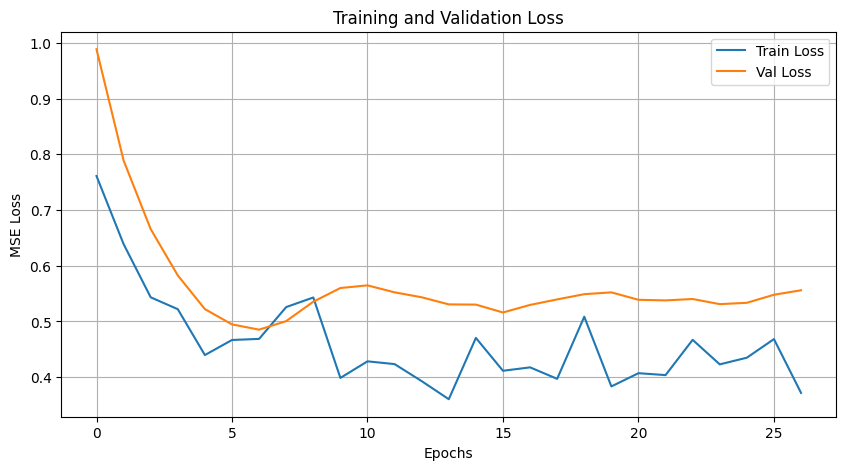

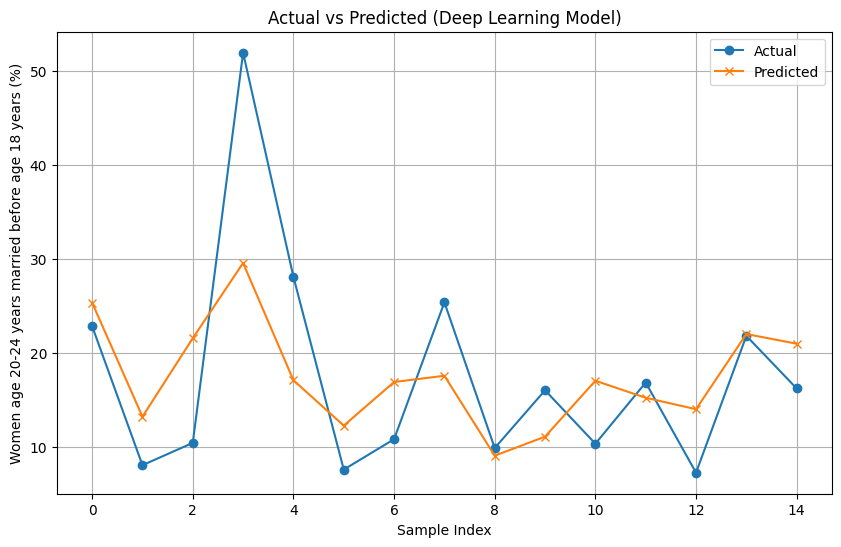

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ------------------ Feature Selection ------------------
features = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)'
]
target = 'Women age 20-24 years married before age 18 years (%)'

X = df[features]
y = df[target]

# ------------------ Polynomial Feature Expansion ------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# ------------------ Standardization ------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_poly)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ------------------ Train-Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ------------------ Deep Learning Model ------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# ------------------ Evaluation ------------------
y_pred_scaled = model.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

# ------------------ Matrix-like Metrics Display ------------------
metrics_matrix = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Value': [mae, mse, rmse, r2]
})
print("\n📊 Regression Metrics:")
print(metrics_matrix.to_string(index=False))

# ------------------ Loss Plot ------------------
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Prediction Plot ------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted (Deep Learning Model)')
plt.xlabel('Sample Index')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = loadtxt('WomenCorrelation.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset['Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)'
]
y = dataset['Women age 20-24 years married before age 18 years (%)'
]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: could not convert string 'District Names' to float64 at row 0, column 1.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load CSV using pandas (handles headers properly)
df = pd.read_csv('WomenCorrelation.csv')

# Drop any non-numeric or identifier columns (like "District Names")
# and select only the features you need
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)',
        'Households using clean fuel for cooking3 (%)']].values

y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = Sequential()
model.add(Dense(12, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_scaled, y, epochs=150, batch_size=10)

# Evaluate the model
_, accuracy = model.evaluate(X_scaled, y)
print('Accuracy: %.2f%%' % (accuracy * 100))


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: -5.4998
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -6.2009  
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -6.7689
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -10.6391 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -16.2399 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -13.2377 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -18.2919 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -21.7406  
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -25.7388 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -27.1574  
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: -27.5736 
Epoch 12/150
8/8 ━━━━━

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset using pandas
df = pd.read_csv('WomenCorrelation.csv')

# Select the input features
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)',
        'Households using clean fuel for cooking3 (%)']].values

# Select the output variable (target)
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Keras model for regression
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model with regression loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

# Evaluate the model on test set
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 295.8571 - mae: 15.4871 - mse: 295.8571
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 323.8467 - mae: 16.3294 - mse: 323.8467 
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 364.1669 - mae: 17.3222 - mse: 364.1669 
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 325.3134 - mae: 16.1698 - mse: 325.3134 
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 266.7275 - mae: 15.0458 - mse: 266.7275
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 375.9306 - mae: 17.4428 - mse: 375.9306
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 307.4733 - mae: 15.8417 - mse: 307.4733
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 334.5532 - mae: 16.4105 - mse: 334.5532 
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 285.1284 - mae: 15.5463 - mse: 285.1284
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 359.8347 - mae: 16.7313 - mse: 359.8348
Epoch 11/150
6/

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 364.9150 - mae: 17.5293 - mse: 364.9150
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 346.5326 - mae: 16.6946 - mse: 346.5326  
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 274.8523 - mae: 15.2004 - mse: 274.8523 
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 264.8163 - mae: 14.8629 - mse: 264.8163 
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 320.4742 - mae: 15.6335 - mse: 320.4742 
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 295.4441 - mae: 15.6460 - mse: 295.4441 
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 329.3258 - mae: 16.2493 - mse: 329.3258 
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 305.3007 - mae: 16.4121 - mse: 305.3007 
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 342.1762 - mae: 16.5467 - mse: 342.1762 
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 302.7249 - mae: 15.7363 - mse: 302.7249  
Epoch 11/150
6/6 ━━━━━━━━━━━━

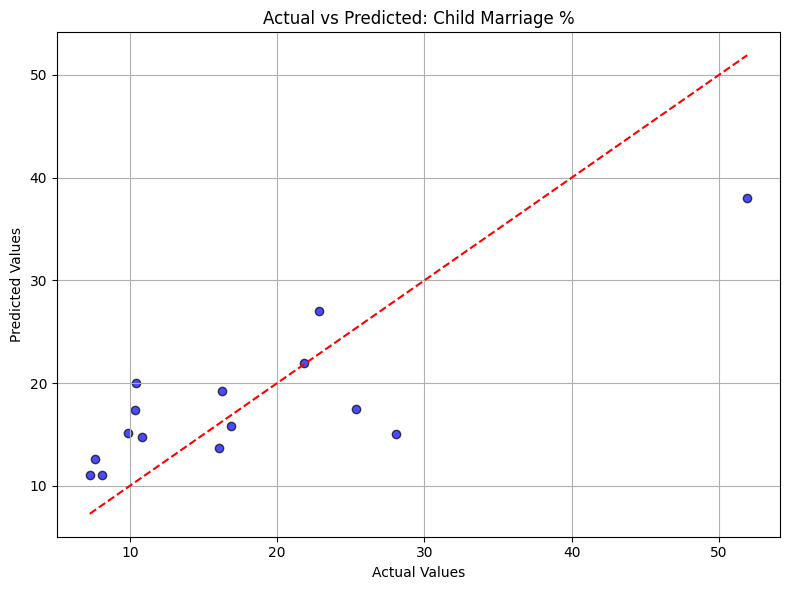

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('WomenCorrelation.csv')

# Select input features
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)',
        'Households using clean fuel for cooking3 (%)']].values

# Select target variable
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the regression model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()



Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 345.5885 - mae: 17.0871 - mse: 345.5885 - val_loss: 407.1261 - val_mae: 18.1143 - val_mse: 407.1261
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 299.0502 - mae: 16.2810 - mse: 299.0502 - val_loss: 398.6685 - val_mae: 17.9183 - val_mse: 398.6685
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 301.5570 - mae: 15.9595 - mse: 301.5570 - val_loss: 388.1996 - val_mae: 17.6747 - val_mse: 388.1996
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 299.9912 - mae: 15.4934 - mse: 299.9912 - val_loss: 375.7835 - val_mae: 17.3804 - val_mse: 375.7835
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 313.3732 - mae: 16.5369 - mse: 313.3732 - val_loss: 360.1139 - val_mae: 16.9990 - val_mse: 360.1139
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 246.8713 - mae: 14.1124 - mse: 246.8713 - val_loss: 342.1003 - val_mae: 16.5435 - val_mse: 342.1003
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 295.0

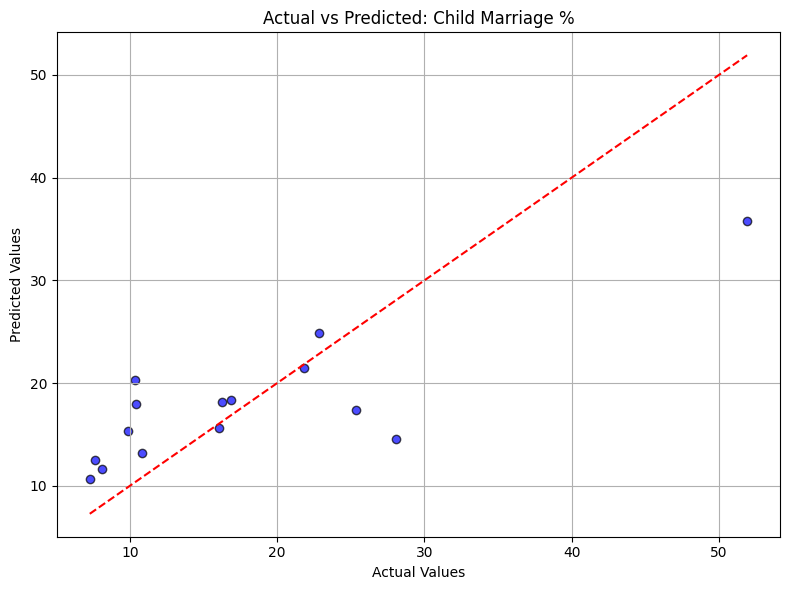

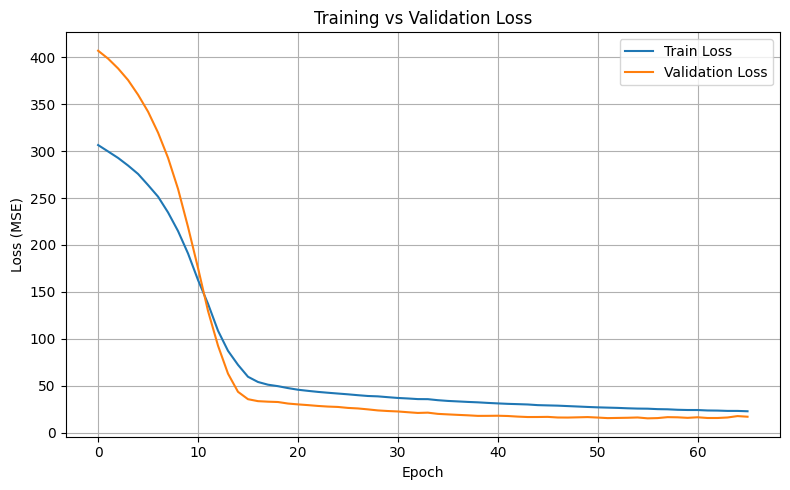

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('WomenCorrelation.csv')

# Select features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)',
        'Households using clean fuel for cooking3 (%)']].values

y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define deep neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=8,
                    callbacks=[early_stop],
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test).flatten()

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv('WomenCorrelation.csv')

# Data Cleaning: Handle missing values
df = df.dropna()

# Outlier Detection: Remove outliers using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Remove rows with Z-score > 3

# Select features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)',
        'Households using clean fuel for cooking3 (%)']].values
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store metrics across folds
r2_scores, mse_scores, mae_scores, rmse_scores = [], [], [], []

# K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Define model
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.2),  # Add dropout for regularization
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compile model with custom learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train model
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=300,
                        batch_size=16,
                        callbacks=[early_stop, lr_scheduler],
                        verbose=1)

    # Predict
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Average metrics across folds
print("\nAverage Metrics Across Folds:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

# Final model training on full dataset for visualization
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(X_scaled, y, validation_split=0.2, epochs=300, batch_size=16,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)],
                    verbose=1)

# Predict on full dataset for visualization
y_pred_full = model.predict(X_scaled).flatten()

# Create a chart for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a chart for Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y - y_pred_full
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_full, residuals, edgecolor='k', color='purple', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'


Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - loss: 321.1712 - mae: 16.7284 - mse: 321.1712 - val_loss: 127.8836 - val_mae: 10.7428 - val_mse: 127.8836 - learning_rate: 0.0010
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 336.4246 - mae: 17.0995 - mse: 336.4246 - val_loss: 124.4290 - val_mae: 10.5848 - val_mse: 124.4290 - learning_rate: 0.0010
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 332.2316 - mae: 16.8764 - mse: 332.2316 - val_loss: 120.5903 - val_mae: 10.4071 - val_mse: 120.5903 - learning_rate: 0.0010
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 364.4995 - mae: 17.9232 - mse: 364.4995 - val_loss: 116.3181 - val_mae: 10.2041 - val_mse: 116.3181 - learning_rate: 0.0010
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 325.2549 - mae: 16.9715 - mse: 325.2549 - val_loss: 111.5521 - val_mae: 9.9719 - val_mse: 111.5521 - learning_rate: 0.0010
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 342.4780 - mae: 17.3535 - mse:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 310.4647 - mae: 16.6135 - mse: 310.4647 - val_loss: 139.1035 - val_mae: 11.2366 - val_mse: 139.1035 - learning_rate: 0.0010
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 328.7661 - mae: 17.1556 - mse: 328.7661 - val_loss: 136.5327 - val_mae: 11.1220 - val_mse: 136.5327 - learning_rate: 0.0010
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 355.0305 - mae: 17.5567 - mse: 355.0305 - val_loss: 133.9605 - val_mae: 11.0065 - val_mse: 133.9605 - learning_rate: 0.0010
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 324.4016 - mae: 16.7296 - mse: 324.4016 - val_loss: 130.8172 - val_mae: 10.8625 - val_mse: 130.8172 - learning_rate: 0.0010
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 323.3319 - mae: 16.8040 - mse: 323.3319 - val_loss: 126.9524 - val_mae: 10.6840 - val_mse: 126.9524 - learning_rate: 0.0010
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 324.5520 - mae: 16.8090 - mse: 324.5520 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - loss: 369.4685 - mae: 17.6502 - mse: 369.4685 - val_loss: 139.9385 - val_mae: 11.2013 - val_mse: 139.9385 - learning_rate: 0.0010
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 341.4301 - mae: 16.9493 - mse: 341.4301 - val_loss: 135.7752 - val_mae: 11.0172 - val_mse: 135.7752 - learning_rate: 0.0010
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 317.7289 - mae: 16.2132 - mse: 317.7289 - val_loss: 131.1972 - val_mae: 10.8106 - val_mse: 131.1972 - learning_rate: 0.0010
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 347.0535 - mae: 16.9360 - mse: 347.0535 - val_loss: 126.1634 - val_mae: 10.5827 - val_mse: 126.1634 - learning_rate: 0.0010
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 327.7319 - mae: 16.6714 - mse: 327.7319 - val_loss: 120.6571 - val_mae: 10.3250 - val_mse: 120.6571 - learning_rate: 0.0010
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 336.7705 - mae: 16.8980 - mse: 336.7705 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 384.6059 - mae: 18.3474 - mse: 384.6059 - val_loss: 132.2753 - val_mae: 11.1272 - val_mse: 132.2753 - learning_rate: 0.0010
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 391.7478 - mae: 18.6239 - mse: 391.7478 - val_loss: 127.8531 - val_mae: 10.9292 - val_mse: 127.8531 - learning_rate: 0.0010
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 350.2718 - mae: 17.6674 - mse: 350.2718 - val_loss: 123.7834 - val_mae: 10.7436 - val_mse: 123.7834 - learning_rate: 0.0010
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 339.4537 - mae: 17.1860 - mse: 339.4537 - val_loss: 120.1905 - val_mae: 10.5768 - val_mse: 120.1905 - learning_rate: 0.0010
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 368.5593 - mae: 17.7453 - mse: 368.5593 - val_loss: 116.0338 - val_mae: 10.3807 - val_mse: 116.0338 - learning_rate: 0.0010
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 352.2048 - mae: 17.5085 - mse: 352.2048 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - loss: 349.8083 - mae: 17.4636 - mse: 349.8083 - val_loss: 152.6301 - val_mae: 11.8974 - val_mse: 152.6301 - learning_rate: 0.0010
Epoch 2/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 302.9406 - mae: 16.2845 - mse: 302.9406 - val_loss: 149.4024 - val_mae: 11.7611 - val_mse: 149.4024 - learning_rate: 0.0010
Epoch 3/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 304.6783 - mae: 16.4446 - mse: 304.6783 - val_loss: 145.7205 - val_mae: 11.6052 - val_mse: 145.7205 - learning_rate: 0.0010
Epoch 4/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 310.5829 - mae: 16.3278 - mse: 310.5829 - val_loss: 141.3211 - val_mae: 11.4170 - val_mse: 141.3211 - learning_rate: 0.0010
Epoch 5/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 275.7653 - mae: 15.6429 - mse: 275.7653 - val_loss: 136.1954 - val_mae: 11.1922 - val_mse: 136.1954 - learning_rate: 0.0010
Epoch 6/600
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 304.9570 - mae: 16.3533 - mse: 304.9570 - v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 390.9341 - mae: 18.5088 - mse: 390.9341 - val_loss: 154.8065 - val_mae: 11.5734 - val_mse: 154.8065 - learning_rate: 0.0010
Epoch 2/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 325.8130 - mae: 17.0549 - mse: 325.8130 - val_loss: 150.7947 - val_mae: 11.3999 - val_mse: 150.7947 - learning_rate: 0.0010
Epoch 3/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 363.8901 - mae: 17.9537 - mse: 363.8901 - val_loss: 146.5608 - val_mae: 11.2138 - val_mse: 146.5608 - learning_rate: 0.0010
Epoch 4/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 361.6272 - mae: 17.7779 - mse: 361.6272 - val_loss: 141.5558 - val_mae: 10.9882 - val_mse: 141.5558 - learning_rate: 0.0010
Epoch 5/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 340.1927 - mae: 17.2500 - mse: 340.1927 - val_loss: 135.5014 - val_mae: 10.7090 - val_mse: 135.5014 - learning_rate: 0.0010
Epoch 6/600
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 296.2675 - mae: 16.1747 - mse: 296.2675 - v

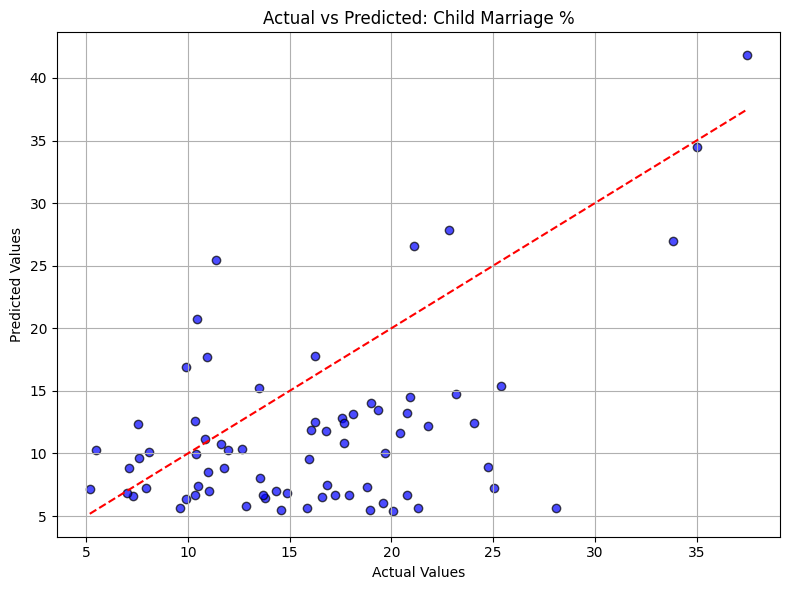

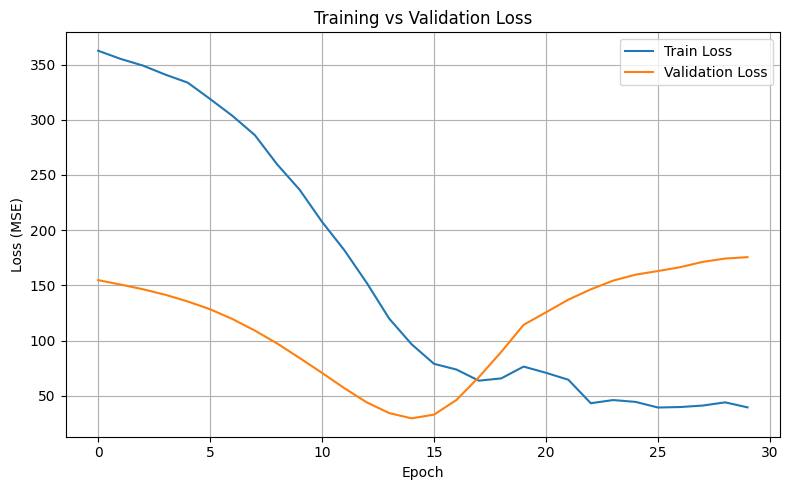

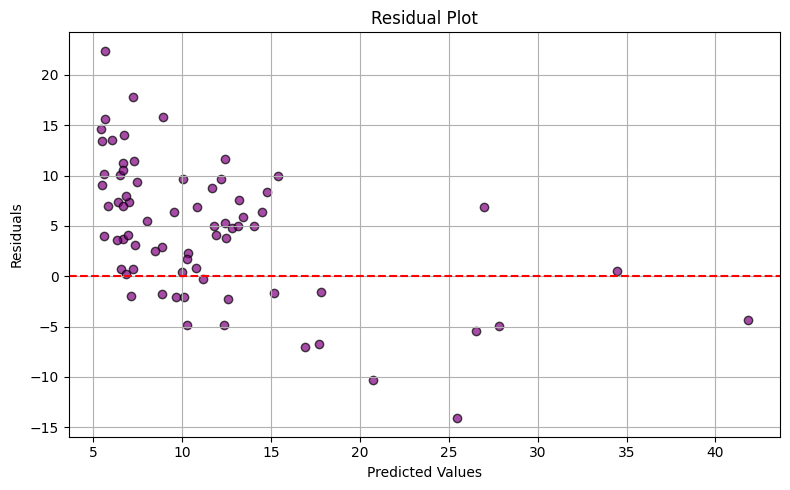

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv('WomenCorrelation.csv')

# Select features and target
columns_to_convert = ['Women (age 15-49) who are literate4 (%)',
                      'Female population age 6 years and above who ever attended school (%)',
                      'Households using clean fuel for cooking3 (%)',
                      'Women age 20-24 years married before age 18 years (%)']

# Convert columns to numeric, coercing errors to NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values (resulting from non-numeric conversion)
df = df.dropna()

# Outlier Detection: Remove rows with Z-score > 3
z_scores = np.abs(stats.zscore(df[columns_to_convert]))
df = df[(z_scores < 3).all(axis=1)]

# Select features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)']].values
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store metrics across folds
r2_scores, mse_scores, mae_scores, rmse_scores = [], [], [], []

# K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Define model
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.2),  # Add dropout for regularization
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compile model with custom learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train model
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=600,
                        batch_size=16,
                        callbacks=[early_stop, lr_scheduler],
                        verbose=1)

    # Predict
    y_pred = model.predict(X_test).flatten()

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Average metrics across folds
print("\nAverage Metrics Across Folds:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

# Final model training on full dataset for visualization
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(X_scaled, y, validation_split=0.3, epochs=600, batch_size=16,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)],
                    verbose=1)

# Predict on full dataset for visualization
y_pred_full = model.predict(X_scaled).flatten()

# Create a chart for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Create a chart for Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y - y_pred_full
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_full, residuals, edgecolor='k', color='purple', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()



Training Fold 1...
Epoch 1/1200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - loss: 362.6744 - mae: 17.9190 - mse: 362.6744 - val_loss: 150.9755 - val_mae: 11.4151 - val_mse: 150.9755 - learning_rate: 0.0010
Epoch 2/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 343.0381 - mae: 17.5034 - mse: 343.0381 - val_loss: 147.1709 - val_mae: 11.2466 - val_mse: 147.1709 - learning_rate: 0.0010
Epoch 3/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 363.9581 - mae: 18.1127 - mse: 363.9581 - val_loss: 142.7495 - val_mae: 11.0480 - val_mse: 142.7495 - learning_rate: 0.0010
Epoch 4/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 346.2769 - mae: 17.6009 - mse: 346.2769 - val_loss: 137.6277 - val_mae: 10.8128 - val_mse: 137.6277 - learning_rate: 0.0010
Epoch 5/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 348.2471 - mae: 17.5971 - mse: 348.2471 - val_loss: 131.7214 - val_mae: 10.5332 - val_mse: 131.7214 - learning_rate: 0.0010
Epoch 6/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 342.0733 - mae: 17.4072 - mse: 342.0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 382.5687 - mae: 18.1522 - mse: 382.5687 - val_loss: 169.2418 - val_mae: 12.0402 - val_mse: 169.2418 - learning_rate: 0.0010
Epoch 2/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 353.8971 - mae: 17.5722 - mse: 353.8971 - val_loss: 166.9471 - val_mae: 11.9433 - val_mse: 166.9471 - learning_rate: 0.0010
Epoch 3/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 340.0197 - mae: 17.1962 - mse: 340.0197 - val_loss: 164.5689 - val_mae: 11.8427 - val_mse: 164.5689 - learning_rate: 0.0010
Epoch 4/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 368.1201 - mae: 17.9723 - mse: 368.1201 - val_loss: 161.7757 - val_mae: 11.7244 - val_mse: 161.7757 - learning_rate: 0.0010
Epoch 5/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 351.7576 - mae: 17.3682 - mse: 351.7576 - val_loss: 158.6690 - val_mae: 11.5904 - val_mse: 158.6690 - learning_rate: 0.0010
Epoch 6/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 344.7906 - mae: 17.3798 - mse: 344.790

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 393.6139 - mae: 18.5896 - mse: 393.6139 - val_loss: 151.2877 - val_mae: 11.2014 - val_mse: 151.2877 - learning_rate: 0.0010
Epoch 2/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 396.0269 - mae: 18.4516 - mse: 396.0269 - val_loss: 147.4712 - val_mae: 11.0311 - val_mse: 147.4712 - learning_rate: 0.0010
Epoch 3/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 396.7269 - mae: 18.5859 - mse: 396.7269 - val_loss: 143.5766 - val_mae: 10.8550 - val_mse: 143.5766 - learning_rate: 0.0010
Epoch 4/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 365.6614 - mae: 17.8878 - mse: 365.6614 - val_loss: 139.3756 - val_mae: 10.6609 - val_mse: 139.3756 - learning_rate: 0.0010
Epoch 5/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 373.9194 - mae: 18.1320 - mse: 373.9194 - val_loss: 134.5070 - val_mae: 10.4316 - val_mse: 134.5070 - learning_rate: 0.0010
Epoch 6/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 379.7541 - mae: 18.2348 - mse: 379.754

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - loss: 341.3524 - mae: 17.6642 - mse: 341.3524 - val_loss: 141.5848 - val_mae: 11.4675 - val_mse: 141.5848 - learning_rate: 0.0010
Epoch 2/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 333.9946 - mae: 17.4400 - mse: 333.9946 - val_loss: 138.5412 - val_mae: 11.3357 - val_mse: 138.5412 - learning_rate: 0.0010
Epoch 3/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 367.0398 - mae: 18.1812 - mse: 367.0398 - val_loss: 135.7895 - val_mae: 11.2151 - val_mse: 135.7895 - learning_rate: 0.0010
Epoch 4/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 332.2372 - mae: 17.4282 - mse: 332.2372 - val_loss: 132.9376 - val_mae: 11.0884 - val_mse: 132.9376 - learning_rate: 0.0010
Epoch 5/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 341.5972 - mae: 17.4911 - mse: 341.5972 - val_loss: 129.8257 - val_mae: 10.9489 - val_mse: 129.8257 - learning_rate: 0.0010
Epoch 6/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 339.8678 - mae: 17.4011 - mse: 339.867

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 366.5624 - mae: 17.8439 - mse: 366.5624 - val_loss: 153.6272 - val_mae: 11.5247 - val_mse: 153.6272 - learning_rate: 0.0010
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 366.9424 - mae: 18.0098 - mse: 366.9424 - val_loss: 149.6429 - val_mae: 11.3498 - val_mse: 149.6429 - learning_rate: 0.0010
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 344.9384 - mae: 17.4482 - mse: 344.9384 - val_loss: 145.2327 - val_mae: 11.1532 - val_mse: 145.2327 - learning_rate: 0.0010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 318.0195 - mae: 16.6626 - mse: 318.0195 - val_loss: 139.8124 - val_mae: 10.9087 - val_mse: 139.8124 - learning_rate: 0.0010
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 351.0102 - mae: 17.6410 - mse: 351.0102 - val_loss: 133.3985 - val_mae: 10.6118 - val_mse: 133.3985 - learning_rate: 0.0010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 341.7257 - mae: 17.2291 - mse: 341.7257 - va

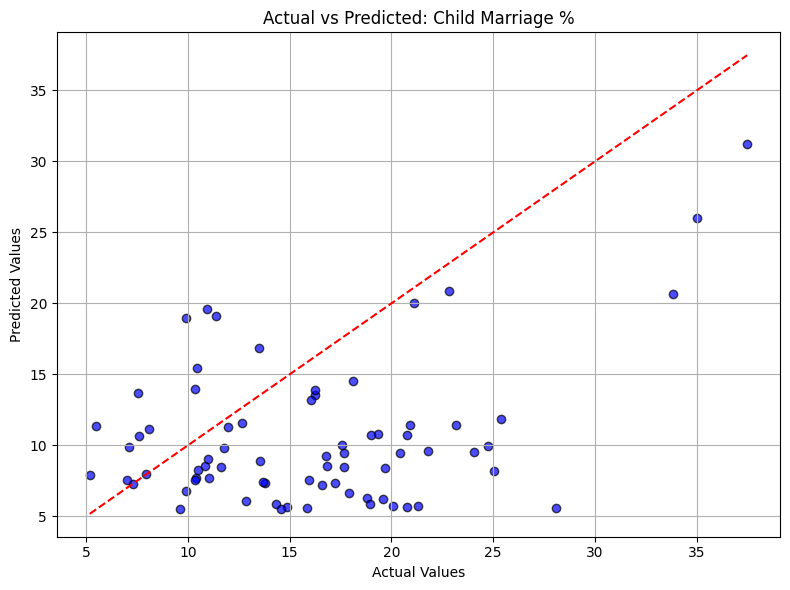

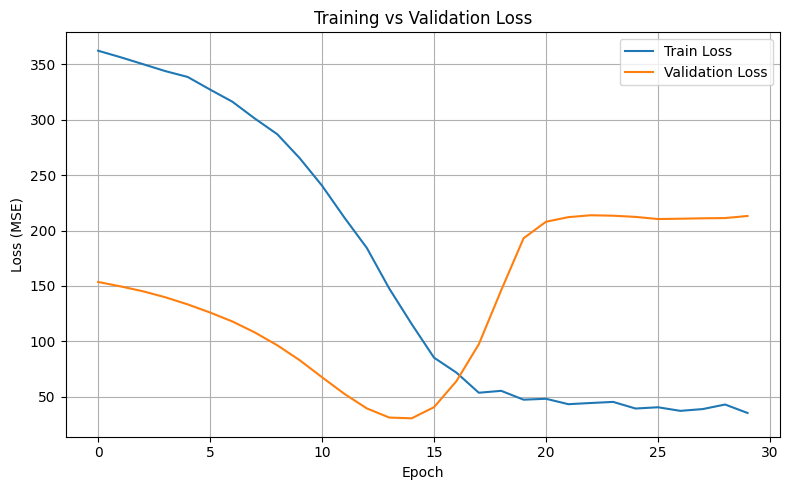

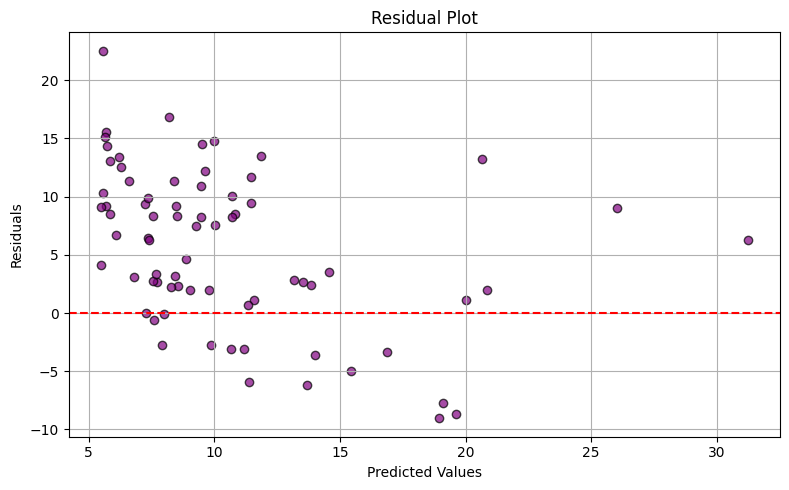

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv('WomenCorrelation.csv')

# Columns to convert
columns_to_convert = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)',
    'Women age 20-24 years married before age 18 years (%)'
]

# Convert to numeric and drop NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

# Outlier removal (Z-score)
z_scores = np.abs(stats.zscore(df[columns_to_convert]))
df = df[(z_scores < 3).all(axis=1)]

# Features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)']].values
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metrics storage
r2_scores, mse_scores, mae_scores, rmse_scores = [], [], [], []

# K-fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Model
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train
    history = model.fit(
        X_train, y_train,
        validation_split=0.3,
        epochs=1200,
        batch_size=16,
        callbacks=[early_stop, lr_scheduler],
        verbose=1
    )

    # Predict & Metrics
    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Average metrics
print("\nAverage Metrics Across Folds:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

# Final model training on full dataset for visualization
model = Sequential([
    Dense(128, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler_final = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_scaled, y,
    validation_split=0.3,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop_final, lr_scheduler_final],
    verbose=1
)

# Store actual epoch numbers for plotting
epochs_ran = history.epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Predict on full dataset
y_pred_full = model.predict(X_scaled).flatten()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss plot (with actual epochs)
plt.figure(figsize=(8, 5))
plt.plot(epochs_ran, train_loss, label='Train Loss')
plt.plot(epochs_ran, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y - y_pred_full
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_full, residuals, edgecolor='k', color='purple', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

df = pd.read_csv('updated_women.csv')


Training Fold 1...
Epoch 1/1200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 684.4595 - mae: 22.2984 - mse: 684.4595 - val_loss: 575.3407 - val_mae: 19.9846 - val_mse: 575.3407 - learning_rate: 0.0010
Epoch 2/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 662.6467 - mae: 21.6792 - mse: 662.6467 - val_loss: 525.5416 - val_mae: 18.7935 - val_mse: 525.5416 - learning_rate: 0.0010
Epoch 3/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 519.9251 - mae: 18.7188 - mse: 519.9251 - val_loss: 440.5778 - val_mae: 16.6358 - val_mse: 440.5778 - learning_rate: 0.0010
Epoch 4/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 500.3273 - mae: 18.1124 - mse: 500.3273 - val_loss: 330.5318 - val_mae: 14.2181 - val_mse: 330.5318 - learning_rate: 0.0010
Epoch 5/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 301.7004 - mae: 13.7712 - mse: 301.7004 - val_loss: 237.2272 - val_mae: 12.4462 - val_mse: 237.2272 - learning_rate: 0.0010
Epoch 6/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 261.2320 - mae: 12.6445 - m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 704.5952 - mae: 22.7815 - mse: 704.5952 - val_loss: 595.2112 - val_mae: 20.2933 - val_mse: 595.2112 - learning_rate: 0.0010
Epoch 2/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 625.3458 - mae: 21.0491 - mse: 625.3458 - val_loss: 554.5233 - val_mae: 19.3141 - val_mse: 554.5233 - learning_rate: 0.0010
Epoch 3/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 585.0931 - mae: 19.9016 - mse: 585.0931 - val_loss: 480.6662 - val_mae: 17.5596 - val_mse: 480.6662 - learning_rate: 0.0010
Epoch 4/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 462.5168 - mae: 17.2551 - mse: 462.5168 - val_loss: 368.9142 - val_mae: 15.0405 - val_mse: 368.9142 - learning_rate: 0.0010
Epoch 5/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 345.9940 - mae: 14.5087 - mse: 345.9940 - val_loss: 252.4313 - val_mae: 12.5830 - val_mse: 252.4313 - learning_rate: 0.0010
Epoch 6/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 317.2076 - mae: 13.7632 - m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 582.7332 - mae: 20.2431 - mse: 582.7332 - val_loss: 570.1377 - val_mae: 19.6430 - val_mse: 570.1377 - learning_rate: 0.0010
Epoch 2/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 584.8198 - mae: 20.6735 - mse: 584.8198 - val_loss: 539.0451 - val_mae: 18.8861 - val_mse: 539.0451 - learning_rate: 0.0010
Epoch 3/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 533.2990 - mae: 19.0930 - mse: 533.2990 - val_loss: 484.4706 - val_mae: 17.5843 - val_mse: 484.4706 - learning_rate: 0.0010
Epoch 4/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 470.0568 - mae: 17.7149 - mse: 470.0568 - val_loss: 393.4185 - val_mae: 15.4870 - val_mse: 393.4185 - learning_rate: 0.0010
Epoch 5/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 372.1991 - mae: 15.3733 - mse: 372.1991 - val_loss: 276.6347 - val_mae: 13.4826 - val_mse: 276.6347 - learning_rate: 0.0010
Epoch 6/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284.2211 - mae: 13.8671 - m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 647.4761 - mae: 21.5537 - mse: 647.4761 - val_loss: 608.9817 - val_mae: 20.0860 - val_mse: 608.9817 - learning_rate: 0.0010
Epoch 2/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 577.1609 - mae: 19.8467 - mse: 577.1609 - val_loss: 584.2614 - val_mae: 19.4750 - val_mse: 584.2614 - learning_rate: 0.0010
Epoch 3/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 611.9460 - mae: 20.6215 - mse: 611.9460 - val_loss: 540.2891 - val_mae: 18.3859 - val_mse: 540.2891 - learning_rate: 0.0010
Epoch 4/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 565.6859 - mae: 19.4363 - mse: 565.6859 - val_loss: 468.0115 - val_mae: 16.6330 - val_mse: 468.0115 - learning_rate: 0.0010
Epoch 5/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 471.9547 - mae: 17.1945 - mse: 471.9547 - val_loss: 370.4281 - val_mae: 14.9681 - val_mse: 370.4281 - learning_rate: 0.0010
Epoch 6/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 337.0479 - mae: 14.2555 - m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 625.7144 - mae: 21.4326 - mse: 625.7144 - val_loss: 484.4114 - val_mae: 17.3749 - val_mse: 484.4114 - learning_rate: 0.0010
Epoch 2/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 659.4182 - mae: 21.6918 - mse: 659.4182 - val_loss: 442.6618 - val_mae: 16.2295 - val_mse: 442.6618 - learning_rate: 0.0010
Epoch 3/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 676.6355 - mae: 21.6365 - mse: 676.6355 - val_loss: 374.6321 - val_mae: 14.3619 - val_mse: 374.6321 - learning_rate: 0.0010
Epoch 4/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 519.5541 - mae: 18.3347 - mse: 519.5541 - val_loss: 277.6082 - val_mae: 12.6615 - val_mse: 277.6082 - learning_rate: 0.0010
Epoch 5/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 412.3907 - mae: 16.3240 - mse: 412.3907 - val_loss: 192.0854 - val_mae: 11.1265 - val_mse: 192.0854 - learning_rate: 0.0010
Epoch 6/1200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 272.0121 - mae: 13.5285 - m

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 711.3193 - mae: 22.8864 - mse: 711.3193 - val_loss: 585.8082 - val_mae: 19.9660 - val_mse: 585.8082 - learning_rate: 0.0010
Epoch 2/1200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 699.7957 - mae: 22.4657 - mse: 699.7957 - val_loss: 582.9565 - val_mae: 19.8803 - val_mse: 582.9565 - learning_rate: 0.0010
Epoch 3/1200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 637.0078 - mae: 21.0697 - mse: 637.0078 - val_loss: 580.0199 - val_mae: 19.7918 - val_mse: 580.0199 - learning_rate: 0.0010
Epoch 4/1200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 710.5572 - mae: 22.6201 - mse: 710.5572 - val_loss: 576.8704 - val_mae: 19.6978 - val_mse: 576.8704 - learning_rate: 0.0010
Epoch 5/1200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 683.2051 - mae: 22.2886 - mse: 683.2051 - val_loss: 573.3757 - val_mae: 19.5980 - val_mse: 573.3757 - learning_rate: 0.0010
Epoch 6/1200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 627.7463 - mae: 21.0022 - mse: 6

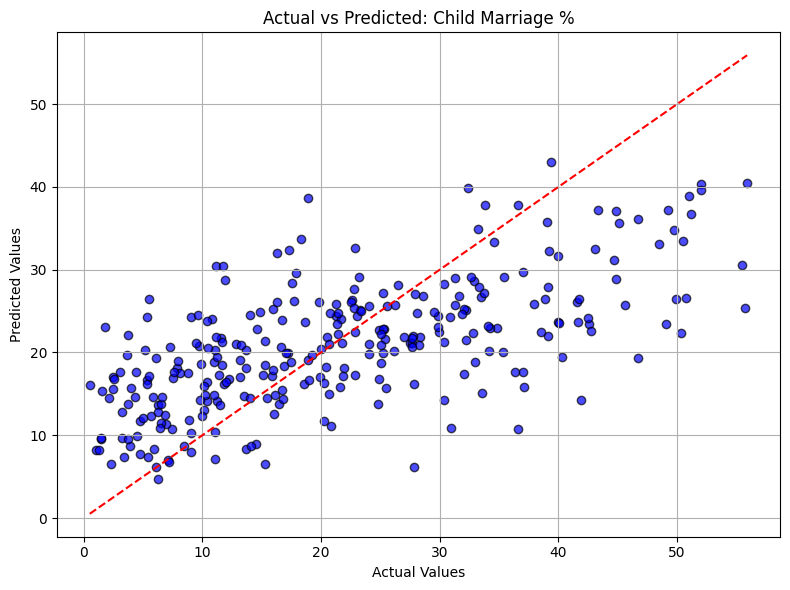

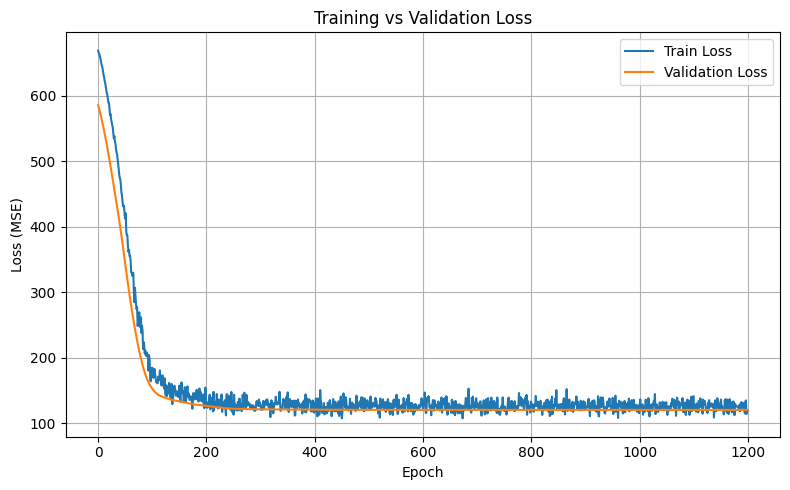

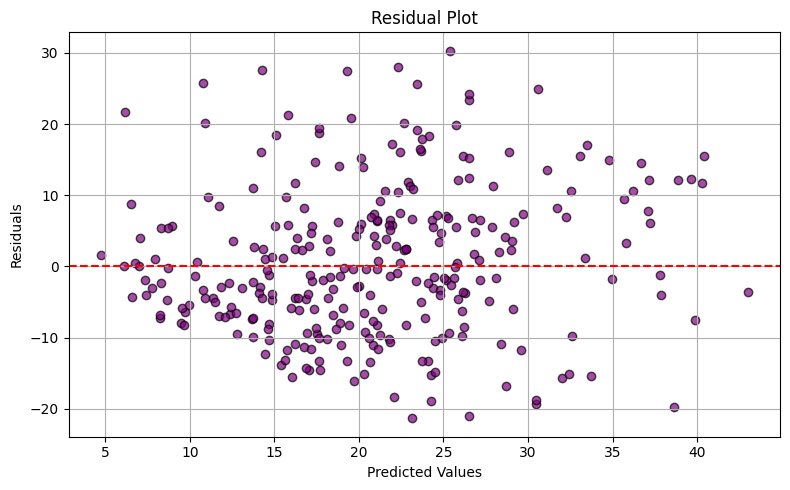

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv('updated_women.csv')

# Columns to convert
columns_to_convert = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)',
    'Women age 20-24 years married before age 18 years (%)'
]

# Convert to numeric and drop NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

# Outlier removal (Z-score)
z_scores = np.abs(stats.zscore(df[columns_to_convert]))
df = df[(z_scores < 3).all(axis=1)]

# Features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)']].values
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metrics storage
r2_scores, mse_scores, mae_scores, rmse_scores = [], [], [], []

# K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Model
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train
    history = model.fit(
        X_train, y_train,
        validation_split=0.3,
        epochs=1200,
        batch_size=16,
        callbacks=[early_stop, lr_scheduler],
        verbose=1
    )

    # Predict & Metrics
    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Average metrics
print("\nAverage Metrics Across Folds:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")
# Final model training on full dataset for visualization
"""
model = Sequential([
    Dense(64, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='relu')
])
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Single hidden layer model
model = Sequential([
    Dense(10, input_shape=(X.shape[1],), activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='relu')  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler_final = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_scaled, y,
    validation_split=0.3,
    epochs=1200,
    batch_size=16,
    callbacks=[early_stop_final, lr_scheduler_final],
    verbose=1
)

# Store actual epoch numbers for plotting
epochs_ran = history.epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Predict on full dataset
y_pred_full = model.predict(X_scaled).flatten()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss plot (with actual epochs)
plt.figure(figsize=(8, 5))
plt.plot(epochs_ran, train_loss, label='Train Loss')
plt.plot(epochs_ran, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y - y_pred_full
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_full, residuals, edgecolor='k', color='purple', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()



Training Fold 1...
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 693.2784 - mae: 22.6193 - mse: 693.2784 - val_loss: 602.8430 - val_mae: 20.6495 - val_mse: 602.8430 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 647.8184 - mae: 21.5285 - mse: 647.8184 - val_loss: 600.0272 - val_mae: 20.5910 - val_mse: 600.0272 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 724.0382 - mae: 23.0775 - mse: 724.0382 - val_loss: 596.8517 - val_mae: 20.5216 - val_mse: 596.8517 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 666.2048 - mae: 21.7548 - mse: 666.2048 - val_loss: 593.3370 - val_mae: 20.4433 - val_mse: 593.3370 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 701.3575 - mae: 22.6494 - mse: 701.3575 - val_loss: 589.7475 - val_mae: 20.3626 - val_mse: 589.7475 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 620.4191 - mae: 21.2889 - mse: 6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 651.0482 - mae: 21.6651 - mse: 651.0482 - val_loss: 617.5344 - val_mae: 20.7694 - val_mse: 617.5344 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 723.1071 - mae: 23.0652 - mse: 723.1071 - val_loss: 616.3451 - val_mae: 20.7338 - val_mse: 616.3451 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 648.2022 - mae: 21.4875 - mse: 648.2022 - val_loss: 615.2111 - val_mae: 20.7000 - val_mse: 615.2111 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 654.9355 - mae: 21.7311 - mse: 654.9355 - val_loss: 614.0510 - val_mae: 20.6653 - val_mse: 614.0510 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 673.7709 - mae: 22.2654 - mse: 673.7709 - val_loss: 612.6317 - val_mae: 20.6234 - val_mse: 612.6317 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 726.7730 - mae: 23.0941 - mse: 726

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 585.9193 - mae: 20.6577 - mse: 585.9193 - val_loss: 582.4549 - val_mae: 19.9981 - val_mse: 582.4549 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 598.3600 - mae: 20.9591 - mse: 598.3600 - val_loss: 579.8484 - val_mae: 19.9427 - val_mse: 579.8484 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 627.7314 - mae: 21.5451 - mse: 627.7314 - val_loss: 577.0748 - val_mae: 19.8830 - val_mse: 577.0748 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 643.8398 - mae: 21.3638 - mse: 643.8398 - val_loss: 574.0367 - val_mae: 19.8178 - val_mse: 574.0367 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 645.7270 - mae: 21.4045 - mse: 645.7270 - val_loss: 570.9231 - val_mae: 19.7507 - val_mse: 570.9231 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 564.9072 - mae: 19.9037 - mse: 56

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 587.5094 - mae: 20.1758 - mse: 587.5094 - val_loss: 622.7021 - val_mae: 20.3971 - val_mse: 622.7021 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 621.9318 - mae: 21.1221 - mse: 621.9318 - val_loss: 620.6791 - val_mae: 20.3575 - val_mse: 620.6791 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 623.3432 - mae: 20.9843 - mse: 623.3432 - val_loss: 618.2547 - val_mae: 20.3062 - val_mse: 618.2547 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 695.8825 - mae: 22.6174 - mse: 695.8825 - val_loss: 615.4160 - val_mae: 20.2401 - val_mse: 615.4160 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 569.1520 - mae: 19.9260 - mse: 569.1520 - val_loss: 612.3080 - val_mae: 20.1671 - val_mse: 612.3080 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 589.7029 - mae: 20.0692 - mse: 5

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 734.9890 - mae: 23.7319 - mse: 734.9890 - val_loss: 492.6166 - val_mae: 17.7864 - val_mse: 492.6166 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 706.7551 - mae: 22.5579 - mse: 706.7551 - val_loss: 489.4663 - val_mae: 17.7100 - val_mse: 489.4663 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 699.9295 - mae: 22.5780 - mse: 699.9295 - val_loss: 486.3124 - val_mae: 17.6318 - val_mse: 486.3124 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 695.9486 - mae: 22.0394 - mse: 695.9486 - val_loss: 482.9399 - val_mae: 17.5491 - val_mse: 482.9399 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 707.1072 - mae: 22.5348 - mse: 707.1072 - val_loss: 479.6907 - val_mae: 17.4684 - val_mse: 479.6907 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 693.7755 - mae: 22.5517 - mse: 6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 667.6239 - mae: 21.8241 - mse: 667.6239 - val_loss: 580.1541 - val_mae: 19.8549 - val_mse: 580.1541 - learning_rate: 0.0010
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 670.2362 - mae: 22.0491 - mse: 670.2362 - val_loss: 577.0714 - val_mae: 19.7871 - val_mse: 577.0714 - learning_rate: 0.0010
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 662.1432 - mae: 21.9403 - mse: 662.1432 - val_loss: 573.2836 - val_mae: 19.7045 - val_mse: 573.2836 - learning_rate: 0.0010
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 714.8682 - mae: 22.6355 - mse: 714.8682 - val_loss: 569.0369 - val_mae: 19.6110 - val_mse: 569.0369 - learning_rate: 0.0010
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 636.9373 - mae: 21.4104 - mse: 636.9373 - val_loss: 564.4221 - val_mae: 19.5079 - val_mse: 564.4221 - learning_rate: 0.0010
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 592.1440 - mae: 20.0883 - mse: 592.

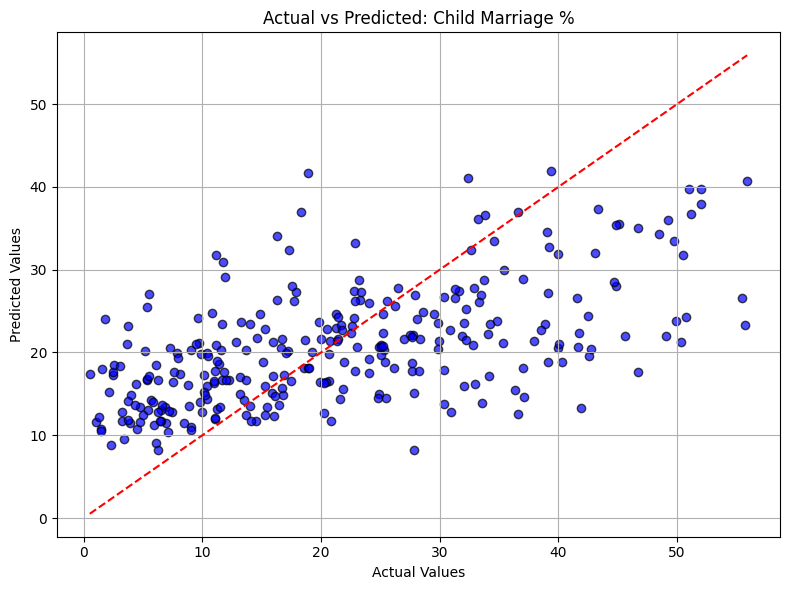

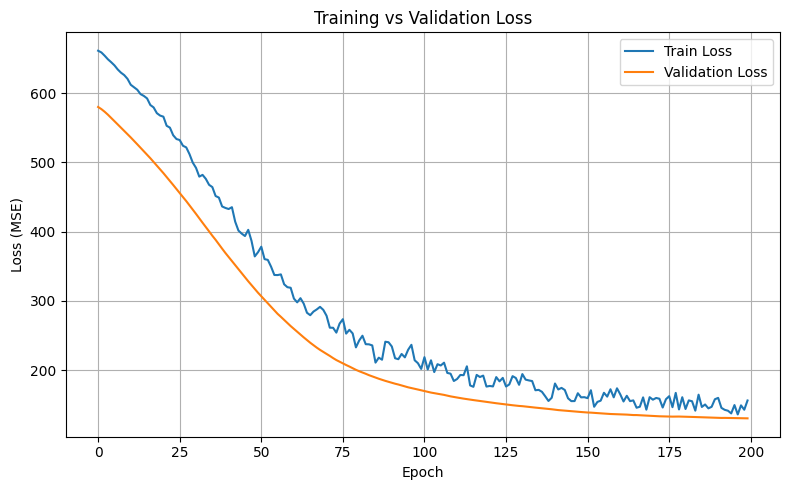

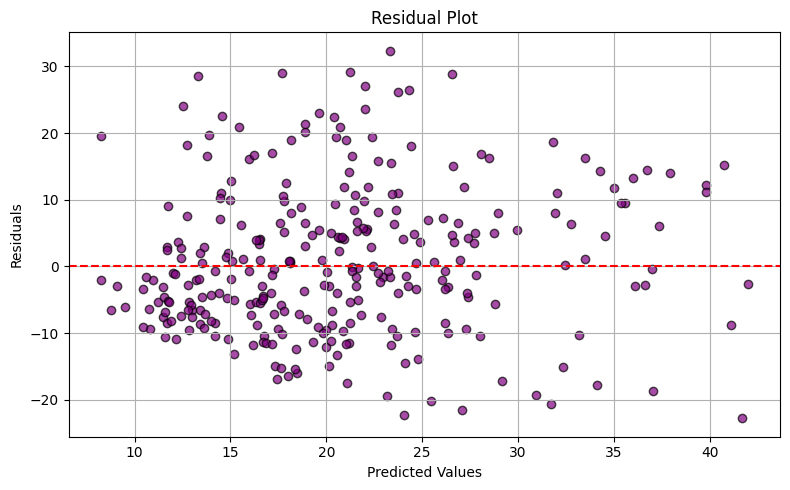

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv('updated_women.csv')

# Columns to convert
columns_to_convert = [
    'Women (age 15-49) who are literate4 (%)',
    'Female population age 6 years and above who ever attended school (%)',
    'Households using clean fuel for cooking3 (%)',
    'Women age 20-24 years married before age 18 years (%)'
]

# Convert to numeric and drop NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

# Outlier removal (Z-score)
z_scores = np.abs(stats.zscore(df[columns_to_convert]))
df = df[(z_scores < 3).all(axis=1)]

# Features and target
X = df[['Women (age 15-49) who are literate4 (%)',
        'Female population age 6 years and above who ever attended school (%)']].values
y = df['Women age 20-24 years married before age 18 years (%)'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Metrics storage
r2_scores, mse_scores, mae_scores, rmse_scores = [], [], [], []

# K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
    print(f"\nTraining Fold {fold + 1}...")
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Model
    """
    model = Sequential([
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    """
    # Final model training on full dataset for visualization
    """
    model = Sequential([
        Dense(64, input_shape=(X.shape[1],), activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ])
    """
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout

    # Single hidden layer model
    model = Sequential([
        Dense(10, input_shape=(X.shape[1],), activation='relu'),  # Hidden layer
        Dropout(0.2),
        Dense(1, activation='relu')  # Output layer
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Train
    history = model.fit(
        X_train, y_train,
        validation_split=0.3,
        epochs=200,
        batch_size=16,
        callbacks=[early_stop, lr_scheduler],
        verbose=1
    )

    # Predict & Metrics
    y_pred = model.predict(X_test).flatten()
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f"Fold {fold + 1} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Average metrics
print("\nAverage Metrics Across Folds:")
print(f"Mean MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Mean MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Mean R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")
# Final model training on full dataset for visualization
"""
model = Sequential([
    Dense(64, input_shape=(X.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='relu')
])
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Single hidden layer model
model = Sequential([
    Dense(10, input_shape=(X.shape[1],), activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='relu')  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler_final = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_scaled, y,
    validation_split=0.3,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop_final, lr_scheduler_final],
    verbose=1
)

# Store actual epoch numbers for plotting
epochs_ran = history.epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Predict on full dataset
y_pred_full = model.predict(X_scaled).flatten()

# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_full, edgecolor='k', color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Child Marriage %')
plt.grid(True)
plt.tight_layout()
plt.show()

# Training vs Validation Loss plot (with actual epochs)
plt.figure(figsize=(8, 5))
plt.plot(epochs_ran, train_loss, label='Train Loss')
plt.plot(epochs_ran, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
residuals = y - y_pred_full
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_full, residuals, edgecolor='k', color='purple', alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()
